# ΣΤΟΧΑΣΤΙΚΑ ΣΗΜΑΤΑ ΚΑΙ ΣΥΣΤΗΜΑΤΑ

## ΘΕΜΑ ΕΞΑΜΗΝΟΥ

### ΑΛΕΞΑΝΔΡΟΣ ΔΗΜΑΣ
### Α.Μ.: 1054531

## Τμήμα Α - προκαταρκτικά

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

Αρχικά φορτώνουμε τα δεδομένα σε μορφή DataFrame.

In [2]:
df = pd.read_csv('data.csv', names=['Index', 'In', 'Out'])  # data gets saved as dataframe format
print(df)

      Index        In       Out
0         1  0.318740  0.415130
1         2 -0.680820 -0.142700
2         3  0.791050  1.000000
3         4 -0.671660 -0.044671
4         5 -0.076757  0.224400
...     ...       ...       ...
4995   4996 -0.023121 -0.087543
4996   4997  0.008927 -0.197530
4997   4998  0.067680 -0.160930
4998   4999 -0.087975 -0.221440
4999   5000  0.037415  0.007356

[5000 rows x 3 columns]


### Α1. Προκαταρκτικά

Σημειώστε το μήκος του σήματος (τιμές-samples) και την περίοδο δειγματοληψίας.Δημιουργείστε γράφημα του σήματος συναρτήσει του χρόνου. Καταγράψτε τις παρατηρήσεις σας.

In [3]:
n = len(df['Out'])
print('The length of the data is: ' + str(n))

The length of the data is: 5000


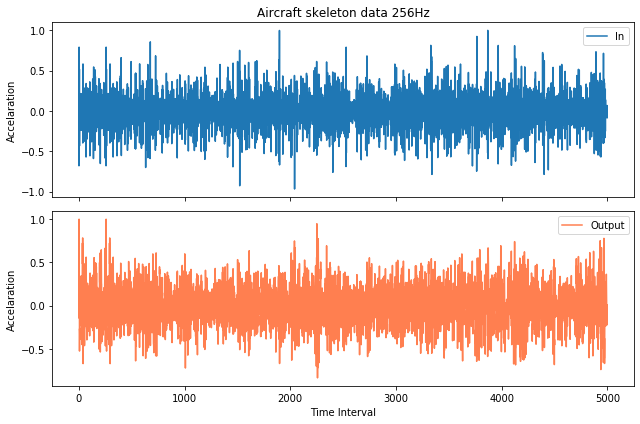

In [4]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex=True,figsize = (9,6))
# INPUT PLOT
ax1.plot(df['In'], label = 'In')
#ax1.set_xlim(1, 5000)
ax1.set_ylabel('Accelaration')
ax1.set_title('Aircraft skeleton data 256Hz')
ax1.legend()

ax2.plot(df['Out'], color  = 'coral', label = 'Output')
#ax2.set_xlim(1, 5000)
ax2.set_ylabel('Accelaration')
ax2.set_xlabel('Time Interval')  # Check "Interval", Should time be used from frequency (256hz)
ax2.legend()
plt.tight_layout()
# plt.savefig('in_out_show.png', dpi = 100)


### Α2. Κανονικοποίηση

Εαν -και μόνο εαν -το σήμα φαίνεται στάσιμο, εκτιμείστε την μέση τιμή και αφαιρέστε την από το σήμα (κεντράρισμα). Μπορείτε να χρησιμοποιήσετε την εντολή `detrend' του MATLAB.Εαν οι τιμές του σήματος είναι πολύ μεγάλες ή πολύ μικρές (σε σχέση με την μονάδα) συνίσταται -γιααριθμητικούς λόγους -να γίνει κανονικοποίηση.  Για τον σκοπό αυτό εκτιμείστε την διασπορά του σήματος και διαιρέστε ολόκληρο το σήμα με την εκτιμηθείσα τυπική απόκλιση (τεταργωνική ρίζα της διασποράς).

In [5]:
out = pd.Series.tolist(df['Out'])  # make list out of column
inp = pd.Series.tolist(df['In'])

m_est_out = sum(out)/n  # mean estimate
m_est_in = sum(inp)/n  # mean estimate

out_center = []  # initialize empty list
in_center = []
for i in range(0,5000):  # fill list
    out_center.append(out[i] - m_est_out)  # center data
    in_center.append(inp[i]-m_est_in)


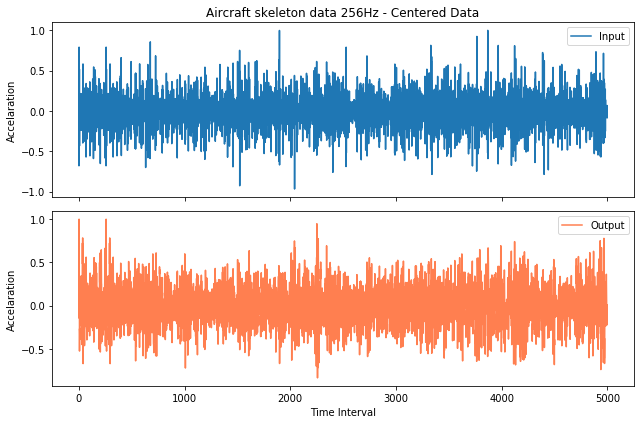

In [6]:
# CENTERED FIGURE
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, sharex=True, figsize = (9,6))
# INPUT PLOT
ax1.plot(in_center, label = 'Input')
#ax1.set_xlim(1, 5000)
ax1.set_ylabel('Accelaration')
ax1.set_title('Aircraft skeleton data 256Hz - Centered Data')
ax1.legend()

ax2.plot(out_center, color  = 'coral', label = 'Output')
#ax2.set_xlim(1, 5000)
ax2.set_ylabel('Accelaration')
ax2.set_xlabel('Time Interval')  # Check "Interval", Should time be used from frequency (256hz)
ax2.legend()
plt.tight_layout()
# plt.savefig('in_out_show.png', dpi = 100)

Δεν χρειάζεται κανονικοποίηση ως προς τις τιμές εξόδου.

### Α3. Προκαταρκτική ανάλυση στο πεδίο χρόνου

Δημιουργείστε γράφημα του σήματος, καθώς επίσης και για τμήματά του.Κατ' αρχήν εξέταση της κανονικότηταςτου σήματος μέσω ιστογράμματος (εμπειρική συνάρτηση πυκνότητας πιθανότητας, αριθμός bins) καιnormalprobabilityplot. Εκτιμείστε την λοξότητα (skewness-ροπή 3ης τάξης).Σημειώνεται ότι για κανονική κατανομή οι περιττές ροπές (πέραν της 1ης) είναι μηδενικές.Κατ ́αρχήν εξέταση αυτοσυμμεταβητότητας(δυναμικότητας) στο σήμα μέσω scatterdiagramsτου τύπου -(. Τοποθετείστε τα διαγράμματα αυτά σε μια συγκεντρωτική εικόνα με subplots.Καταγράψτε τις παρατηρήσεις σας.

<class 'matplotlib.axes._subplots.AxesSubplot'>


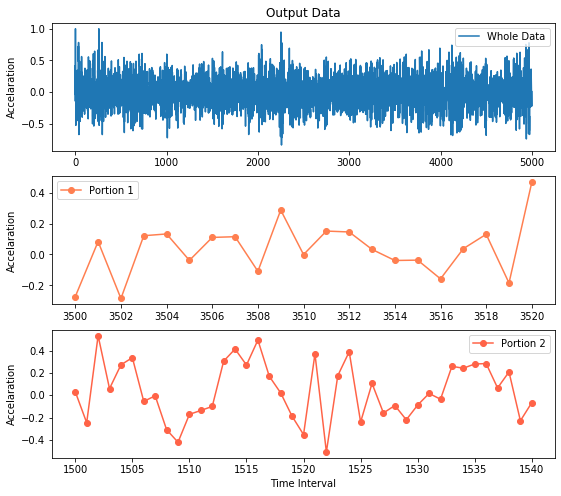

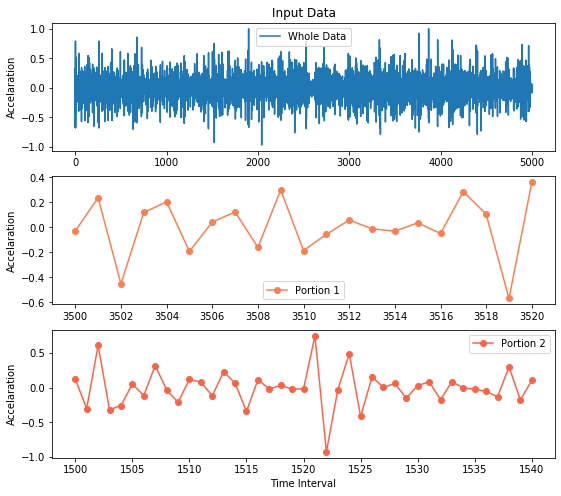

In [7]:
def portions(x):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize=(9, 8))
    ax1.plot(x, label = 'Whole Data')

    if x == out:
        ax1.set_title('Output Data')
    else:
        ax1.set_title('Input Data')
    
    ax1.set_ylabel('Accelaration')
    ax1.legend()
    ax2.plot(x[3500:3521], 'o-',color = 'coral', label = 'Portion 1')  # FIX XTICKS
    ax2.set_ylabel('Accelaration')
    ax2.set_xticks(np.arange(0,21,2))
    ax2.set_xticklabels(np.arange(3500,3521,2))
    ax2.legend()

    ax3.plot(x[1500:1541], 'o-', color = 'tomato', label = 'Portion 2')  # FIX XTICKS
    ax3.set_xlabel('Time Interval')
    ax3.set_ylabel('Accelaration')
    ax3.set_xticks(np.arange(0,41,5))
    ax3.set_xticklabels(np.arange(1500,1541,5))
    ax3.legend()
    # plt.savefig('porsion.png', dpi = 100)

portions(out)
portions(inp)
print(type(ax1))

In [8]:
mu1 = m_est_in
mu2 = m_est_out

# use numpy built in function
var = (pd.DataFrame.var(df))
print(var)
sigma1 = math.sqrt(var[1])  # standard deviation
sigma2 = math.sqrt(var[2])

x = np.linspace(-1, 1, 100)

Index    2.083750e+06
In       3.856698e-02
Out      5.284970e-02
dtype: float64


Text(0.5, 0, 'Output Value')

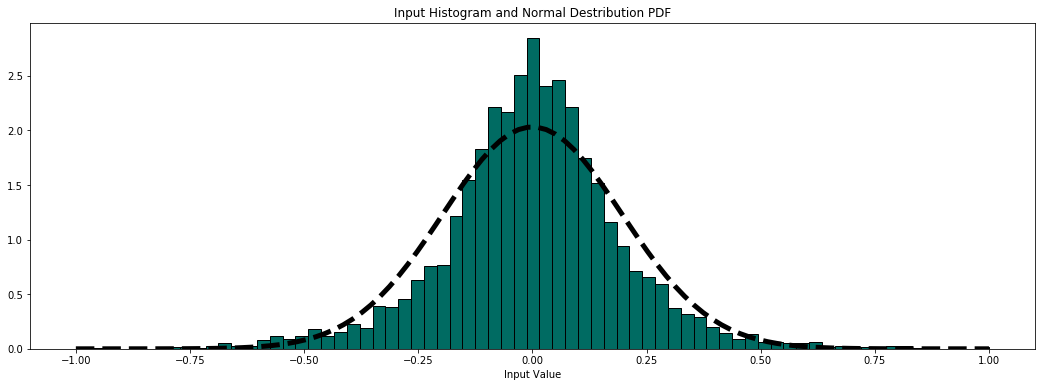

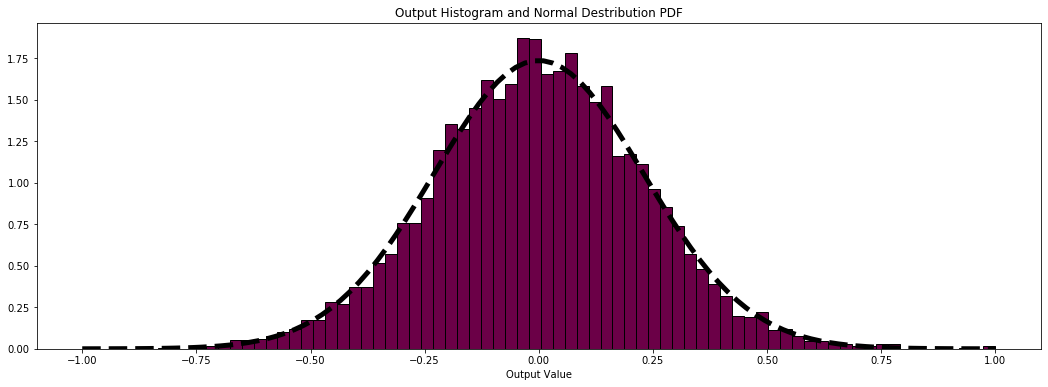

In [9]:
plt.figure(num=5, figsize=(18, 6))  # histogram
plt.hist(inp, bins=int(np.sqrt(n)),edgecolor='black', density='True', color = '#006B62')
plt.plot(x, (1 / (sigma1 * np.sqrt(2 * np.pi))) * np.exp(-1 / 2 * ((x - mu1) / sigma1) ** 2),'--', linewidth=5, color = 'black')  # normal destribution pdf
plt.title('Input Histogram and Normal Destribution PDF')
plt.xlabel('Input Value')
# _ = plt.savefig('hist_IN.png', dpi = 100)
        
plt.figure(num=6, figsize=(18, 6))  # histogram
plt.hist(out, bins=int(np.sqrt(n)),edgecolor='black', density='True', color = '#6B0047')
plt.plot(x, (1 / (sigma2 * np.sqrt(2 * np.pi))) * np.exp(-1 / 2 * ((x - mu2) / sigma2) ** 2),'--' ,linewidth=5, color = 'black')  # normal destribution pdf         
plt.title('Output Histogram and Normal Destribution PDF')        
plt.xlabel('Output Value')
# _ = plt.savefig('hist_OUT.png', dpi = 100)

Παρατηρούμε ότι οι τιμές εξόδου ακολουθούν κανονική κατανομή.

In [10]:
print('Skewness for Input is estimated as: ' + str(df['In'].skew().round(4)))
print('Skewness for Output is estimated as: ' + str(df['Out'].skew().round(4)))

Skewness for Input is estimated as: -0.0253
Skewness for Output is estimated as: 0.028


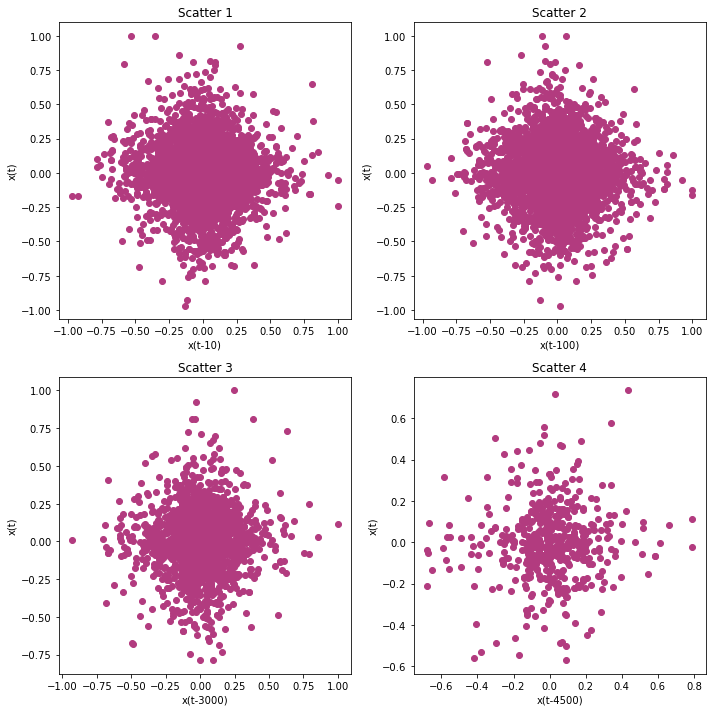

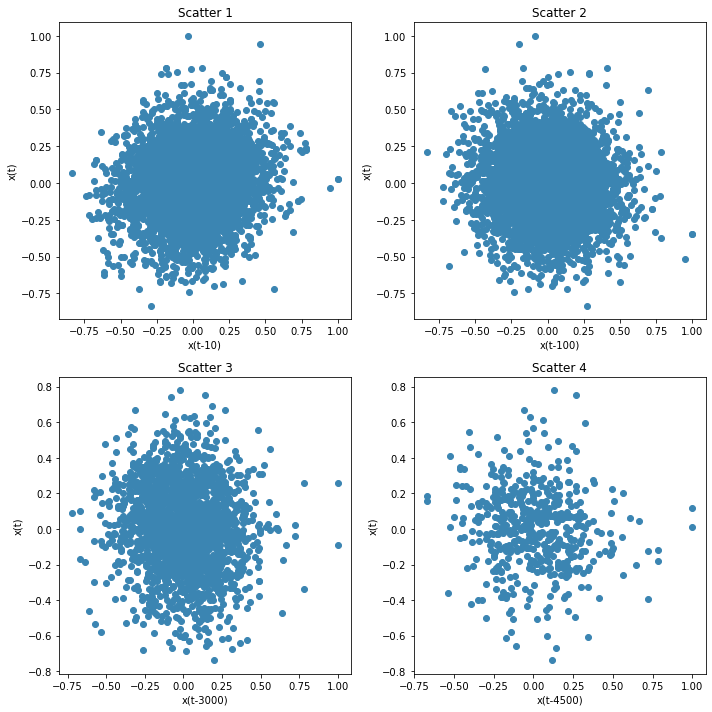

In [20]:
import random

dummy = True
def scat_k(x,col): 
    r = 1
    plt.figure(figsize = (10,10))
    for k in [10,100,3000,4500]:
        plt.subplot(2,2,r)
        plt.xlabel('x(t-' + str(k) + ')')
        plt.ylabel('x(t)')
        plt.title('Scatter ' + str(r))
        r+=1
        
        l=0
        m=k
        while m<len(out)-1:
            plt.scatter(x[l],x[m], color = col)
            l+=1
            m+=1
        plt.tight_layout()
        
scat_k(inp, '#B23B7F')
scat_k(out, '#3B85B2')

## Τμήμα Β-μη παραμετρική ανάλυση

### Β1. Μη παραμετρική ανάλυση στο πεδίο χρόνου

Εκτιμείστετην ανηγμένη αυτοσυμμεταβλητότητα (normalizedautocovariancefunction ή correlationcoefficients) του σήματος(). Εντολή `corrcoef' στο MATLAB.Δημιουργείστε ένα ή περισσότερα (δηλ. τμηματικά) γραφήματα(correlograms).Κάνετε έλεγχο λευκότητας του σήματος τοποθετώντας τα στατιστικά όρια σημαντικότηταςγια τον έλεγχο εκάστου . Εαν έχετε επιλέξει επίπεδο σφάλματος 5%(ήτοι πιθανότητα σφάλματος 5%)τότε δεν θα πρέπει να ξεπερνούν τα όρια περισσότερα από 5% των τιμών του σήματος για να γίνει αποδεκτή η υπόθεση λευκότητας.Καταγράψτε τις παρατηρήσεις σας.

### Β2. Μη παραμετρική ανάλυση στο πεδίο συχνοτήτων

Σύσταση: Συνίσταται το μέτρο του Μετασχηματισμό Fourierκαι όλα τα φάσματα να υποδεικνύονται σε db.Υπολογίστε τον Διακριτό Μετασχηματισμό Fourier (Discrete Fourier Transform, DFT) του σήματος (εντολή MATLAB`fft') και δημιουργείστε γράφημα μέτρουμε τον άξονα συχνοτήτων βαθμονομημένο σε Hz(ως γνωστόν εργάζεσθε στην περιοχή συχνοτήτων ). Υπολογίστε και καταγράψτε το “συχνοτικό βήμα” (διακρισιμότητα –resolution ως προς την συχνότητα). Δημιουργείστε περισσότερα (δηλ. τμηματικά) γραφήματα εφόσον απαιτείται.Υπολογίστε και δημιουργείστε γράφημα του περιοδογράμματος (periodogram). Υπολογίστε και καταγράψτε το “συχνοτικό βήμα”Εκτιμείστε το φάσμα (συνάρτηση φασματικής πυκνότητας -powerspectraldensity, psd)μέσω της μεθόδου Welch. Χρησιμοποιείστε διαφορετικά segmentlengthsγια σύγκριση, και για κάθε ένα υπολογίστε το “συχνοτικό βήμα”.  Το overlapμπορεί να πάρει και υψηλές τιμές (λ.χ. 95%) εαν απαιτείται. Μπορούν να γίνουν συγκρίσειςμε διάφορες τιμές του.Εκτιμείστε το φάσμα μέσω της μεθόδου Blackman-Tukey.Δημιουργείστε συγκριτικό γράφημα για τις εκτιμήσεις μέσω περιοδογράμματος -Welch(επιλεγείσες παράμετροι)  -Blackman-Tukey.Καταγράψτε τις παρατηρήσεις σας.

### Β3. Έλεγχος στασιμότητας 

Χωρίστε το σήμα σε έναν μικρό αριθμό τμημάτων, έστω .Εκτιμείστε την συνάρτηση αυτοσυμμεταβλητότηταςσε κάθε τμήμα, και δημιουργείστε γράφημα στο οποίο εμφανίζονται όλες μαζί οι συναρτήσεις ανά lag. Εξετάστε κατά πόσον μπορούν να θεωρηθούν μεταξύ τους ίσες.Επαναλάβετε με τις εκτιμήσεις φάσματος (είτε Welchείτε Blackman-Tukey).Προβείτε σε (δυαδικούς) ελέγχους υποθέσεων ισότητας του φάσματος σε διάφορα τμήματα (στασιμότητα).Καταγράψτε τις παρατηρήσεις σας.

## Τμήμα Γ-παραμετρική ανάλυση AR

### Γ1. Προκαταρκτικά 

Χωρίστε το σήμα σε δύο τμήματα: Το 1ο (και κατά κανόνα πολύ μεγαλύτερο, μήκους τιμών) θα αναφέρεται ως τμήμα εκτίμησης(estimation set) ενώ το 2ο (μικρό, μήκους τιμών) θα αναφέρεται ως τμήμα ελέγχου εγκυρότητας(validation set). 

### Γ2. Εκτίμηση μοντέλων AR

Χρησιμοποιώντας τμήμα εκτίμησηςτου σήματος εκτιμείστε μοντέλα για (ως απαιτείται). Για κάθε εκτιμηθέν μοντέλο καταγράψτε την συνάρτηση πιθανοφάνειας, τα κριτήριαAICκαι BIC, το RSS/SSS(ResidualSumofSquaresδια SeriesSumofSquares), και τον conditionnumberτου αντιστρεφόμενου (κατά την κάθε εκτίμηση) πίνακα(τιμές εκτός των ορίων θεωρούνται επίφοβες και υποδεικνύουν δυνητικά αριθμητικά προβλήματα). Επίσης τον αριθμό τιμών του σήματος που χρησιμοποιούνται στην εκτίμηση δια του (εκάστοτε) αριθμού εκτιμηθέντων παραμέτρων -SamplesPerParamater(SPP). Συνίσταται .Δημιουργείστε γραφήματα των μεγεθών αυτών (το ένα κάτω από το άλλο για καλή εποπτεία).Γραφήματα σταθεροποίησης:α) Συνίσταται η χρήση γραφήματος σταθεροποίησηςσυχνοτήτων(frequencystabilizationdiagram) στο οποίο τοποθετούνται οι φυσικές συχνότητες (κατά προτίμηση σε Hz-με λόγο απόσβεσης ) στον οριζόντιο άξονα, ενώ στον κατακόρυφο άξονα υποδεικνύεται η τάξη του μοντέλου. Στο γράφημα ουσιαστικά παρακολουθούμε την δυνητική σταθεροποίηση (σύγκλιση)των φυσικών συχνοτήτων καθώς αυξάνει η τάξη του μοντέλου. Οι συχνότητες για τις οποίες έχει επέλθει σύγκλιση θεωρούνται `πραγματικές' ενώ εκείνες οι οποίες δεν φαίνεται να συγκλίνουν αλλά εμφανίζουν `τυχαία' συμπεριφορά θεωρούνται 'ψευδοσυχνότητες' (οφειλόμενες σε αριθμητικό ή άλλο θόρυβο).β) Συνίσταται η χρήση γραφήματος σταθεροποίησηςτου φάσματος (PSDstabilizationdiagram).  Στο γράφημα αυτό παρατίθεται το φάσμα του μοντέλου με διαφορετικό χρώμα κάθε φορά που αυξάνεται η τάξη του μοντέλου (λ.χ. ανοιχτό χρώμα το οποίο σκουραίνει καθώς αυξάνεται η τάξη). Εξετάστε για ποιά τάξη φαίνεταινα επέρχεται σταθεροποίηση (σύγκλιση).Καταγράψτε τις παρατηρήσεις σας.Επί τη βάσει όλων των παραπάνω επιλέξτε ένα τελικό μοντέλο.

### Γ3. Έλεγχος εγκυρότητας του επιλεγέντος μοντέλου AR

Προβείτε σε έλεγχο εγκυρότητας του επιλεγέντοςμοντέλου, στο τμήμα ελέγχου εγκυρότητας(εαν θέλετε, δευτερευόντως, και στο τμήμα εκτίμησης) βάσει: Υπολογισμού –γραφήματος των υπολοίπων.Δημιουργίας ιστογράμματος & normalprobabityplotγια έλεγχο κανονικότητας των υπολοίπων.Είναι τελικά κανονικό το σήμα;Εκτίμησης της ανηγμένης αυτοσυμμεταβλητότητας των υπολοίπων και ελέγχου της υπόθεσης λευκού θορύβου.Καταγράψτε τις παρατηρήσεις σας.

### Γ4. Ανάλυση του επιλεγέντος μοντέλου AR

Για το επιλεγέν μοντέλο παραθέστε τα εξής: Εκτιμηθείσες AR παράμετροι (μόνο εαν είναι έως 15) και πίνακαςσυνδιασποράς των εκτιμήσεων.Εκτιμηθείσα διασπορά λευκού θορύβου.
Υπολογισμός και παράσταση στο μογαδικό πεδίο των πόλων του μοντέλου σε σχέση με τον μοναδιαίο κύκλο. Υπολογίστε και τοποθετείστε σε πίνακα τις φυσικές συχνότητες, λόγους απόσβεσης του μοντέλου (με παχείς χαρακτήρες οι πραγματικές συχνότητες, με κανονικούς οι ψευδοσυχνότητες).
Δημιουργείστε γράφημα του φάσματος του μοντέλου.Συγκρίνετε (στο ίδιο γράφημα) με τα μη παραμετρικά εκτιμηθέντα φάσματα.Καταγράψτε τις παρατηρήσεις σας.

### Γ5. Πρόβλεψη βάσει του επιλεγέντος μοντέλου AR

Χρησιμοποιείστε το τελικά επιλεγέν μοντέλο για τον υπολογισμό των προβλέψεων ενός βήματος του σήματος τόσο στο τμήμα εκτίμησης όσο και στο τμήμα ελέγχου εγκυρότητας. Δημιουργείστε γράφημα στο οποίο να υποδεικνύονται τόσο οι πραγματικές τιμές του σήματος όσο και οι προβλεφθείσες (με διαφορετικό συμβολισμό, λ.χ. `ο' για τις πραγματικές τιμές και `x'για τις προβλέψεις)για μικρό τμήμα του σήματος (για ευκρίνεια). Δημιουργείστε ξεχωριστό (σε μεγέθυνση) γράφημα για το τμήμα ελέγχου εγκυρότητας.Καταγράψτε τις παρατηρήσεις σας

## Τμήμα Δ-παραμετρική ανάλυση ARΜΑ (προαιρετικά)

Επαναλάβετε το Τμήμα Γχρησιμοποιώντας μοντέλα για (ως απαιτείται).Επιπρόσθετα -σε σχέση με τα μοντέλα AR-να εξετάζεται η αντστρεψιμότητα (invertibility) του κάθε εκτιμηθέντος μοντέλου.Να γίνει σύγκριση του τελικά επιλεγέντος μοντέλου ARMAμε το επιλεγέν AR.